# Configure the Environment

In [1]:
%matplotlib inline
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings; warnings.filterwarnings(action='once')
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import keras

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

# Read / Explore the Data

In [2]:
data_path = '/content/drive/MyDrive/3학년1학기/명예학회/Mushrooms/mushrooms.csv'
df = pd.read_csv(data_path)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
columns = df.columns
for col in columns:
    print('{feat_name}:{feat_values}'.format(feat_name=col, feat_values=df[col].unique()))

class:['p' 'e']
cap-shape:['x' 'b' 's' 'f' 'k' 'c']
cap-surface:['s' 'y' 'f' 'g']
cap-color:['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises:['t' 'f']
odor:['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment:['f' 'a']
gill-spacing:['c' 'w']
gill-size:['n' 'b']
gill-color:['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape:['e' 't']
stalk-root:['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring:['s' 'f' 'k' 'y']
stalk-surface-below-ring:['s' 'f' 'y' 'k']
stalk-color-above-ring:['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring:['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type:['p']
veil-color:['w' 'n' 'o' 'y']
ring-number:['o' 't' 'n']
ring-type:['p' 'e' 'l' 'f' 'n']
spore-print-color:['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population:['s' 'n' 'a' 'v' 'y' 'c']
habitat:['u' 'g' 'm' 'd' 'p' 'w' 'l']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df.shape

(8124, 23)

In [7]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
df["class"].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['p', 'e'], dtype=object)

<Axes: xlabel='class', ylabel='count'>

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


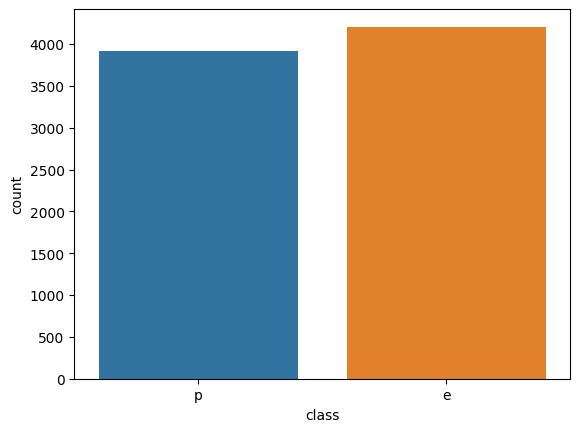

In [9]:
sns.countplot(x='class', data=df)

In [10]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['class'])
print(y)

[1 0 0 ... 0 1 0]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
X = df.drop('class', axis=1)
columns = X.columns

for i in range(len(X.columns)):
    le = preprocessing.LabelEncoder()
    X[columns[i]] = le.fit_transform(X[columns[i]])

X.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [12]:
for col in columns:
    print('{}:{}'.format(col, X[col].nunique()))

cap-shape:6
cap-surface:4
cap-color:10
bruises:2
odor:9
gill-attachment:2
gill-spacing:2
gill-size:2
gill-color:12
stalk-shape:2
stalk-root:5
stalk-surface-above-ring:4
stalk-surface-below-ring:4
stalk-color-above-ring:9
stalk-color-below-ring:9
veil-type:1
veil-color:4
ring-number:3
ring-type:5
spore-print-color:9
population:6
habitat:7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
sequences = []
columns = X.columns

for idx, row in X.iterrows():
    sequence = []
    for i in range(len(columns)):
        sequence.append(row[columns[i]])
    sequences.append(sequence)

print('{sequence} : {label}'.format(sequence=sequences[0], label=y[0]))
print('len of sequences :', len(sequences[0]))

[5, 2, 4, 1, 6, 1, 0, 1, 4, 0, 3, 2, 2, 7, 7, 0, 2, 1, 4, 2, 3, 5] : 1
len of sequences : 22


In [14]:
RANDOM_SEED = 42
x_train, x_test, y_train, y_test = train_test_split(sequences, y, test_size=0.1, random_state=RANDOM_SEED)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_train = np.array(y_train)

print(x_train, y_train)

[[2 0 9 ... 1 4 0]
 [5 0 5 ... 2 3 0]
 [2 0 2 ... 2 4 0]
 ...
 [2 3 4 ... 3 5 4]
 [3 2 2 ... 7 4 4]
 [3 0 3 ... 7 2 1]] [1 1 0 ... 0 1 0]


# Build and Train the Model

In [15]:
def build_model():
    embeddings_dims = 300
    max_seq_length = len(sequences[0])
    max_features = 12
    filters = 250
    kernel_size = 3
    hidden_dims = 250
    using_pretrained_emb = False 

    model = Sequential()

    if using_pretrained_emb:
        model.add(layers.Embedding(max_features, embeddings_dims, input_length=max_seq_length, trainable=False))
    else:
        model.add(layers.Embedding(max_features, embeddings_dims, input_length=max_seq_length))

    model.add(layers.Dropout(0.5))
    model.add(layers.Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
    model.add(layers.MaxPooling1D())
    model.add(layers.Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
    model.add(layers.MaxPooling1D())
    model.add(layers.Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(hidden_dims))
    model.add(layers.Dropout(0.5))
    model.add(layers.Activation('relu'))
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    
    return model

In [16]:
model = build_model()
model.summary()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 300)           3600      
                                                                 
 dropout (Dropout)           (None, 22, 300)           0         
                                                                 
 conv1d (Conv1D)             (None, 20, 250)           225250    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 250)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 250)            187750    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 250)           0         
 1D)                                                    

In [17]:
# Train
history = model.fit(x_train, y_train, epochs=10, verbose=True, validation_data=(x_test, y_test), batch_size=16)

Epoch 1/10
457/457 [==============================] - 22s 10ms/step - loss: 0.6921 - accuracy: 0.5345 - val_loss: 0.6907 - val_accuracy: 0.6224
Epoch 2/10
457/457 [==============================] - 3s 6ms/step - loss: 0.6908 - accuracy: 0.5484 - val_loss: 0.6892 - val_accuracy: 0.6691
Epoch 3/10
457/457 [==============================] - 3s 6ms/step - loss: 0.6897 - accuracy: 0.5685 - val_loss: 0.6877 - val_accuracy: 0.6962
Epoch 4/10
457/457 [==============================] - 3s 7ms/step - loss: 0.6886 - accuracy: 0.5799 - val_loss: 0.6862 - val_accuracy: 0.7515
Epoch 5/10
457/457 [==============================] - 4s 8ms/step - loss: 0.6876 - accuracy: 0.5961 - val_loss: 0.6846 - val_accuracy: 0.8290
Epoch 6/10
457/457 [==============================] - 3s 6ms/step - loss: 0.6865 - accuracy: 0.6146 - val_loss: 0.6829 - val_accuracy: 0.8733
Epoch 7/10
457/457 [==============================] - 3s 6ms/step - loss: 0.6844 - accuracy: 0.6423 - val_loss: 0.6811 - val_accuracy: 0.8782
Epoc

# Metrics

26/26 [==============================] - 0s 2ms/step
acc:0.5325953259532595
prec:0.0
rec:0.0
f1:0.0
f1_macro:0.34751203852327445
auc:0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


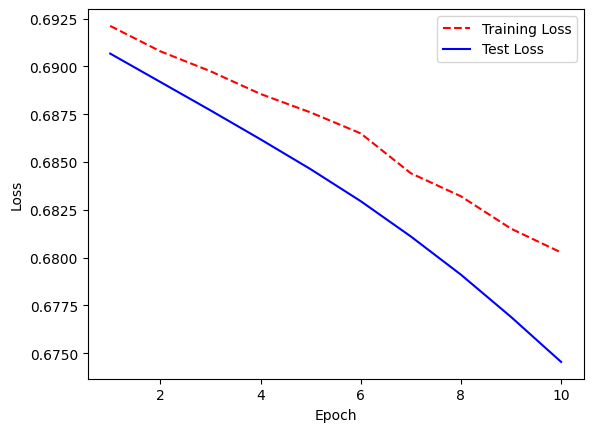

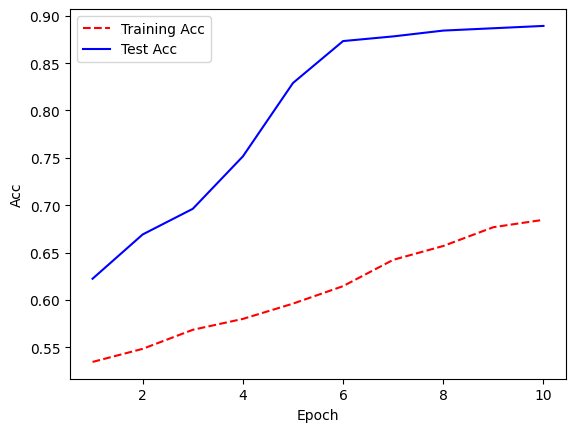

In [18]:
# 예측하기
predictions = model.predict(x_test)
# 예측된 클래스 인덱스 가져오기
predicted_classes = np.argmax(predictions, axis=1)

cnn_metrics = {'acc': metrics.accuracy_score(y_test, predicted_classes)}
cnn_metrics['prec'] = metrics.precision_score(y_test, predicted_classes)
cnn_metrics['rec'] = metrics.recall_score(y_test, predicted_classes)
cnn_metrics['f1'] = metrics.f1_score(y_test, predicted_classes)
cnn_metrics['f1_macro'] = metrics.f1_score(y_test, predicted_classes, average='macro')
cnn_metrics['auc'] = metrics.roc_auc_score(y_test, predicted_classes)

for metric in cnn_metrics:
  print('{metric_name}:{metric_value}'.format(metric_name=metric, metric_value=cnn_metrics[metric]))

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test accuracy history.
training_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Visualize acc history
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.legend(['Training Acc', 'Test Acc'])
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.show();

# Visualize Activations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 0s 164ms/step


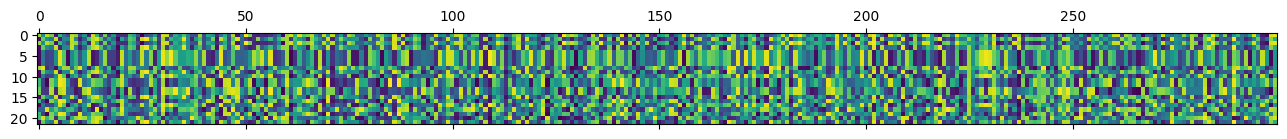

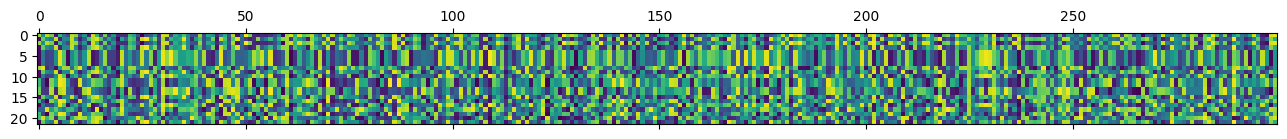

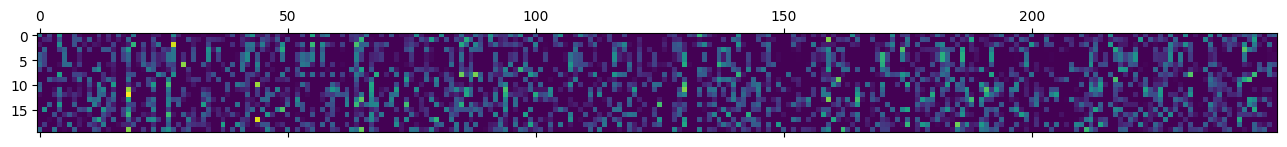

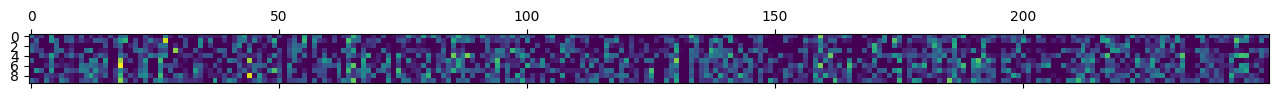

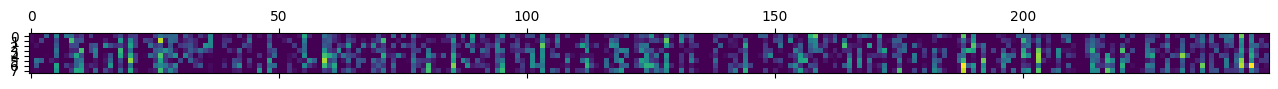

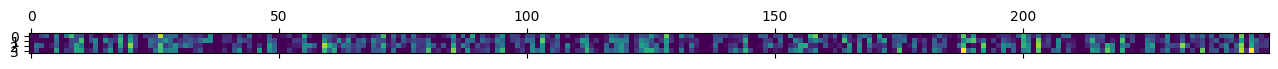

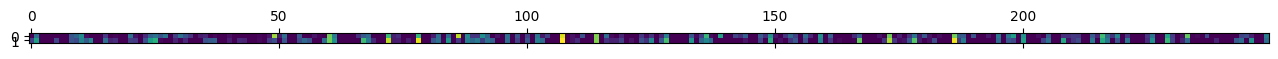

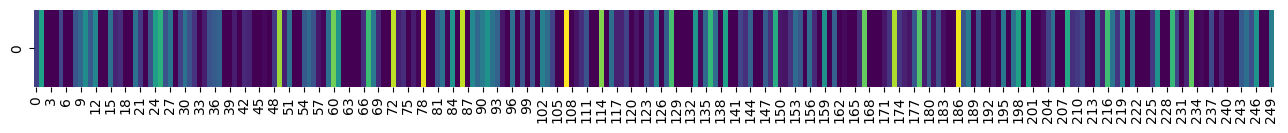

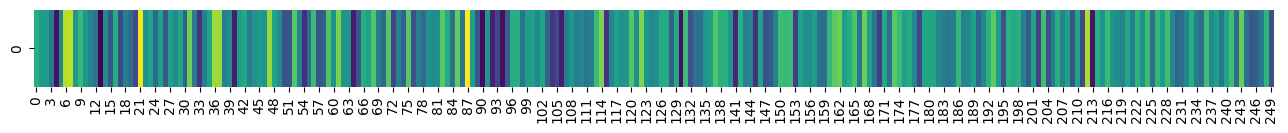

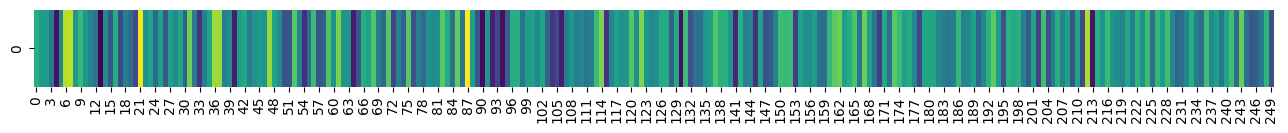

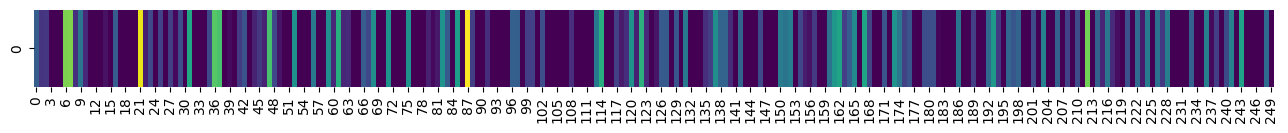

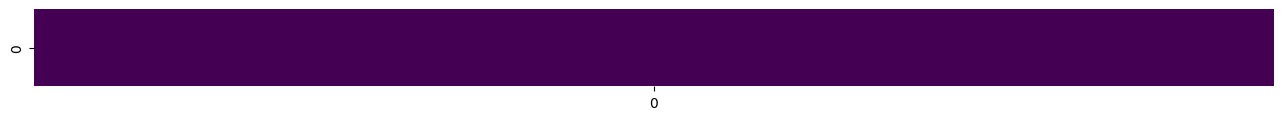

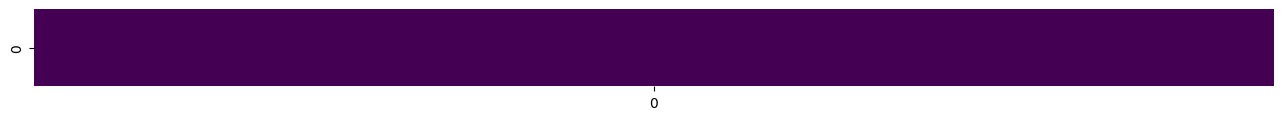

In [19]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(x_train[1].reshape(1, 22))

for layer_num, act in enumerate(activations):
    if len(act.shape) > 2:
        plt.rcParams["axes.grid"] = False
        plt.matshow(act[0, :, :], cmap='viridis')
    else:
        plt.figure(figsize = (16,1))
        sns.heatmap(act, cbar=False, cmap='viridis')